In [2]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

csvpath1 = os.path.join("raw_data/city_data.csv")
csvpath2 = os.path.join("raw_data/ride_data.csv")
city = pd.read_csv(csvpath1)
rides = pd.read_csv(csvpath2)
city_df = pd.DataFrame(city)
rides_df = pd.DataFrame(rides)

Part 1

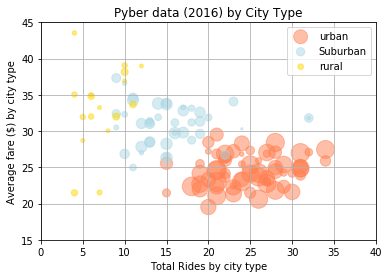

In [19]:
average_fare = rides_df.groupby('city').fare.mean()

#New dataframe for average fare by city
mean_fare = pd. DataFrame (average_fare).reset_index(drop = False)
mean_fare.columns = ['city','average_fare_per_city']

#New Datafrmae for total rides by city
total_rides = rides_df.groupby('city').ride_id.count()
total_rides = pd. DataFrame (total_rides).reset_index(drop = False)
total_rides.columns=['city','total_rides_per_city']

#Combining the two dataframes above
merged_df = pd.merge( mean_fare, total_rides,on='city')
merged_df

#combining the merged dataframe with the city information
merged2_df = pd.merge( merged_df, city_df,how='right',on='city')

#making a new column to pass the color information for the bubble plot
merged2_df["color"] = merged2_df["type"]
merged2_df["color"].replace(['Urban', 'Suburban' , 'Rural'], ['Coral', 'LightBlue','Gold'], inplace=True)

#making three sub-datasets to plot.
urban = merged2_df[merged2_df["type"] == "Urban"]
rural = merged2_df[merged2_df["type"] == "Rural"]
Suburban = merged2_df[merged2_df["type"] == "Suburban"]

#plot statements

plt.scatter(urban['total_rides_per_city'],urban['average_fare_per_city'], s=urban['driver_count'] *5,
            c=urban['color'],alpha=.5, label='urban' )

plt.scatter(Suburban['total_rides_per_city'],Suburban['average_fare_per_city'], s=Suburban['driver_count'] *5,
            c=Suburban['color'],alpha=.5, label='Suburban' )

plt.scatter(rural['total_rides_per_city'],rural['average_fare_per_city'], s=rural['driver_count'] *5,
          c=rural['color'],alpha=.5, label='rural' )



plt.legend()

plt.ylim(15, 45)
plt.xlim(0, 40)
plt.title("Pyber data (2016) by City Type")
plt.xlabel("Total Rides by city type")
plt.ylabel("Average fare ($) by city type")
plt.grid()

plt.show()


Part 2

In [7]:
Rides_and_City_df = pd.merge( rides_df, city_df,on='city')
Rides_and_City_df

total_fare = Rides_and_City_df.fare.sum()



fare = Rides_and_City_df.groupby('type').sum()
fare_df = pd.DataFrame(fare)
fare_df.reset_index(inplace=True)
fare_df['fare_percentage']= fare_df['fare']*100/total_fare



fare_df

,type,fare,ride_id,driver_count,fare_percentage
0,Rural,4255.09,658729360193746,727,6.579786
1,Suburban,20335.69,3139583688401015,9730,31.445750
2,Urban,40078.34,7890194186030600,64501,61.974463


Constructing the piechart

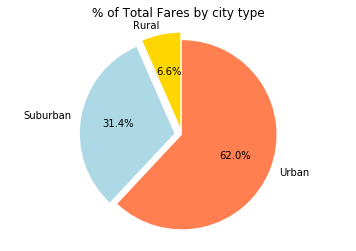

In [25]:
explode = (0.08, 0.08, 0)
colors = ['Gold', 'LightBlue','Coral']
plt.title("% of Total Fares by city type")
plt.pie(fare_df['fare_percentage'], explode=explode, labels=fare_df['type'], colors=colors,
        autopct="%1.1f%%", startangle=90)
plt.axis("equal")
plt.show()

total drivers by city type pie chart

In [21]:
total_driver = city_df.driver_count.sum()

city_df_2 = city_df.groupby('type').sum()

city_df_2 = city_df_2.reset_index()

city_df_2['driver_percentage']= city_df_2['driver_count']*100/total_driver

city_df_2

,type,driver_count,driver_percentage
0,Rural,104,3.105405
1,Suburban,638,19.050463
2,Urban,2607,77.844133


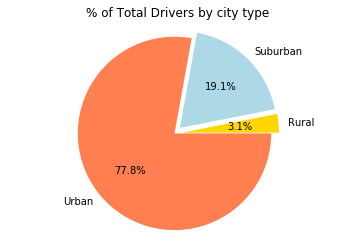

In [22]:

explode = (0.08, 0.08, 0)
plt.title("% of Total Drivers by city type")
plt.pie(city_df_2['driver_percentage'], explode=explode, labels=city_df_2['type'], colors=colors,
        autopct="%1.1f%%", startangle=0)
plt.axis("equal")
plt.show()

% of Total Rides by City Type

In [23]:
Rides = Rides_and_City_df.groupby('type').count()

Total_Rides = Rides.ride_id.sum()

Rides['Total_Rides_Percentage']= Rides['ride_id']*100/Total_Rides

Rides.reset_index(inplace=True)

Rides

,type,city,date,fare,ride_id,driver_count,Total_Rides_Percentage
0,Rural,125,125,125,125,125,5.193187
1,Suburban,657,657,657,657,657,27.295388
2,Urban,1625,1625,1625,1625,1625,67.511425


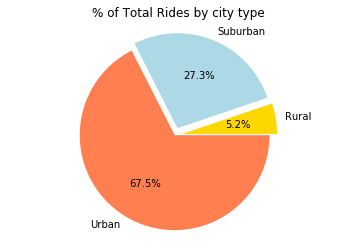

In [24]:
explode = (0.08, 0.08, 0)
plt.title("% of Total Rides by city type")
plt.pie(Rides['Total_Rides_Percentage'], explode=explode, labels=Rides['type'], colors=colors,
        autopct="%1.1f%%", startangle=0)
plt.axis("equal")
plt.show()

Observations:
-Even though the Suburban and Rural city types have lower % of total drivers, they contribute more on % of total rides and % of fares.
-Average fare in rural and sub-urban city types are higher than urban city type with lower number of total rides. This shows the car sharing services are more adopted in urban areas and are cheaper may be due to the distnace of each ride and availability.  